In [4]:
import torch

# 创建一个 2x3 的随机张量
x = torch.rand(2, 3)
print("随机张量：", x)

# 查看张量的形状
print("张量形状：", x.size())

# 创建一个全零张量
zeros_tensor = torch.zeros(2, 3)
print("全零张量：", zeros_tensor)

# 创建一个全一张量
ones_tensor = torch.ones(2, 3)
print("全一张量：", ones_tensor)


随机张量： tensor([[0.4291, 0.5138, 0.4666],
        [0.5012, 0.7106, 0.7810]])
张量形状： torch.Size([2, 3])
全零张量： tensor([[0., 0., 0.],
        [0., 0., 0.]])
全一张量： tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# 创建一个张量，并设置 requires_grad=True 来跟踪它的计算历史
x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)

# 进行张量运算
y = x + 2
z = y * y * 3
out = z.mean()

# 使用 backward() 方法进行反向传播
out.backward()

# 输出梯度
print("梯度：", x.grad)


梯度： tensor([[4.5000, 6.0000],
        [7.5000, 9.0000]])


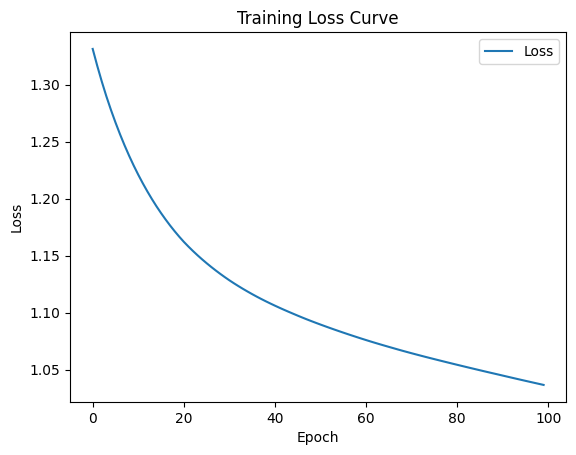

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 定义一个简单的神经网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 准备模拟数据
inputs = torch.randn(100, 10)
labels = torch.randn(100, 1)

# 实例化神经网络、损失函数和优化器
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 训练神经网络并记录损失和准确率
losses = []
for epoch in range(100):
    # 梯度清零
    optimizer.zero_grad()
    
    # 前向传播
    outputs = net(inputs)
    
    # 计算损失
    loss = criterion(outputs, labels)
    losses.append(loss.item())  # 记录每个epoch的损失
    
    # 反向传播和优化
    loss.backward()
    optimizer.step()

# 绘制损失曲线
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


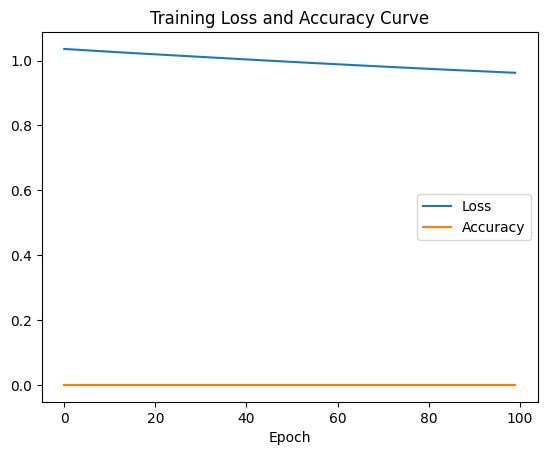

In [7]:
# 定义准确率指标
def accuracy(outputs, labels):
    with torch.no_grad():
        predicted = (outputs > 0.5).float()
        correct = (predicted == labels).float()
        accuracy = correct.sum() / len(correct)
        return accuracy.item()

# 训练神经网络并记录损失和准确率
losses = []
accuracies = []
for epoch in range(100):
    # 梯度清零
    optimizer.zero_grad()
    
    # 前向传播
    outputs = net(inputs)
    
    # 计算损失
    loss = criterion(outputs, labels)
    losses.append(loss.item())  # 记录每个epoch的损失
    
    # 计算准确率
    acc = accuracy(outputs, labels)
    accuracies.append(acc)  # 记录每个epoch的准确率
    
    # 反向传播和优化
    loss.backward()
    optimizer.step()

# 绘制损失和准确率曲线
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.title('Training Loss and Accuracy Curve')
plt.legend()
plt.show()
